nueva: [[-1.59367581e+01  2.53980260e+02 -4.04762197e+03  6.45059724e+04
  -1.02801608e+06  1.63832436e+07 -2.61095791e+08  4.16102047e+09]
 [-2.91529792e+01  8.49896197e+02 -2.47770062e+04  7.22323546e+05
  -2.10578833e+07  6.13900035e+08 -1.78970150e+10  5.21751305e+11]
 [ 3.61895486e+01  1.30968343e+03  4.73968522e+04  1.71527069e+06
   6.20748719e+07  2.24646160e+09  8.12984311e+10  2.94215353e+12]
 [ 3.74921873e+01  1.40566411e+03  5.27014222e+04  1.97589159e+06
   7.40804977e+07  2.77743990e+09  1.04132297e+11  3.90414759e+12]
 [-4.80588295e+01  2.30965109e+03 -1.10999128e+05  5.33448815e+06
  -2.56369256e+08  1.23208064e+10 -5.92123532e+11  2.84567638e+13]
 [-8.94145794e+00  7.99496701e+01 -7.14866612e+02  6.39194974e+03
  -5.71533498e+04  5.11034273e+05 -4.56939146e+06  4.08570215e+07]
 [ 1.53077929e+01  2.34328523e+02  3.58705250e+03  5.49098568e+04
   8.40548715e+05  1.28669456e+07  1.96964539e+08  3.01509237e+09]
 [-3.47062658e+01  1.20452489e+03 -4.18045609e+04  1.45088020e

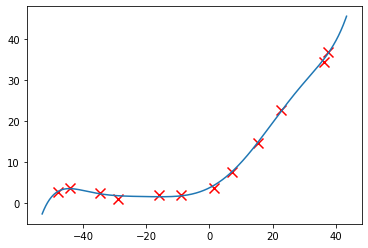

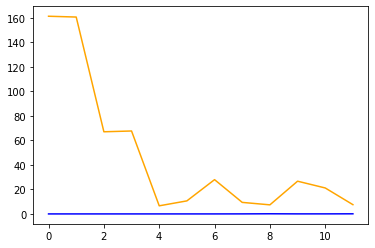

In [1]:
import numpy as np
from scipy.io import loadmat
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def sigmoide(x):
    return 1 / (1 + np.exp(-x))

#Función para el coste
def coste(theta, X, y, landa, m):
    h = np.dot(X, theta)

    return ((1 / (2 * m)) * (np.sum(np.square(h - y)))) + ((landa / (2 * m)) * np.sum(np.square(theta[1:len(theta)])))
    
#Función para calculo de gradiente
def gradiente(theta, XX, Y, landa, m): 
    h = np.dot(XX, theta)

    grad = (1 / m) * np.dot(XX.T, h - Y)+((landa/m) * theta)
    return grad

def coste_y_gradiente(theta, X, Y, landa, m):

    theta = theta.reshape(-1, Y.shape[1])

    cost = coste(theta, X, Y, landa, m)
    grad = gradiente(theta, X, Y, landa, m)
    
    grad[0] = (1 / m) * np.dot(X.T, np.dot(X, theta) - Y)[0]

    return (cost, grad.flatten())

def calcOptTheta(X, Y, landa):
    theta = np.zeros((X.shape[1], 1))
    
    def costFunction(theta):
        return coste_y_gradiente(theta, X, Y, landa, len(X))

    result = minimize(fun=costFunction, x0=theta, method='CG', jac=True, options={'maxiter':200})
    
    return result.x

def curva_aprendizaje(X, y, landa, Xval, yval):

    err1 = np.zeros((len(X)))
    err2 = np.zeros((len(X)))

    i = 1
    while (i < len(X) + 1):
        thetas = calcOptTheta(X[0:i], y[0:i], landa)

        err1[i - 1] = coste_y_gradiente(thetas, X[0:i], y[0:i], landa, len(X))[0]
        err2[i - 1] = coste_y_gradiente(thetas, Xval, yval, landa, len(Xval))[0]
        i += 1   

    return err1, err2    

def pinta_puntos(X, Y):
    plt.scatter(X, Y, 100,  marker = 'x', c = 'red', label = 'Entrada')

def pinta_Curva_Aprendizaje(err1, err2):
    
    a = np.arange(len(err1))
    b = err1
    plt.plot(a, b, c="blue", label="Train")

    d = err2[0:len(err1)]
    plt.plot(a, d, c="orange", label="Cross Validation")

def normaliza_Matriz(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    
    sigma = np.std(X_norm, axis=0)
    X_norm = X_norm / sigma
    
    return X_norm, mu, sigma

def transforma_entrada(X, p):
    nX = X
    for i in range(1, p):
        nX = np.column_stack((nX, np.power(X, i+1)))   

    return nX
    
def pinta_regresion_Polinomial(X, p, mu, sigma, theta):
    x = np.array(np.arange(min(X) - 5,  max(X) + 6, 0.02))
    nX = transforma_entrada(x, p)
    print("NewX:", nX)
    nX = nX - mu
    nX = nX / sigma
    nX = np.insert(nX, 0, 1, axis=1)
    plt.plot(x, np.dot(nX, theta))

def main():
    data = loadmat("ex5data1.mat")

    X = data["X"]
    y = data["y"]
    Xval = data["Xval"]
    yval = data["yval"]

    landa = 0
    #Numero de variables
    p = 8

    nuevaentrada = transforma_entrada(X, p)
    print("nueva:", nuevaentrada)
    nuevaentrada, mu, sigma = normaliza_Matriz(nuevaentrada)
    nuevaentrada = np.insert(nuevaentrada, 0, 1, axis=1)  
    
    thetaOpt = calcOptTheta(nuevaentrada, y, landa)
    pinta_regresion_Polinomial(X, p, mu, sigma, thetaOpt)
    
    pinta_puntos(X,y)
    plt.show()

    neuvaEntradaValidacion = transforma_entrada(Xval, p)
    neuvaEntradaValidacion = neuvaEntradaValidacion - mu
    neuvaEntradaValidacion = neuvaEntradaValidacion / sigma
    neuvaEntradaValidacion = np.insert(neuvaEntradaValidacion, 0, 1, axis=1)

    err1, err2 = curva_aprendizaje(nuevaentrada, y, landa, neuvaEntradaValidacion, yval)

    pinta_Curva_Aprendizaje(err1, err2)

    plt.show()

main()

map: [[ 1.00000000e+00 -3.78243704e-01 -7.88662325e-01  1.90328720e-01
  -7.37591303e-01  3.20251970e-01 -6.17151602e-01  3.59835014e-01
  -5.31091256e-01]
 [ 1.00000000e+00 -8.38920100e-01  1.31420204e-03 -2.58961742e-01
  -3.41564822e-01  9.75492734e-02 -4.55196644e-01  2.66773432e-01
  -4.68873807e-01]
 [ 1.00000000e+00  1.43871736e+00  6.10831582e-01  1.30534069e+00
   2.56220001e-01  1.02186338e+00 -1.26962121e-02  7.90210009e-01
  -1.77926980e-01]
 [ 1.00000000e+00  1.48412330e+00  7.38068463e-01  1.42031240e+00
   4.13121830e-01  1.15534830e+00  1.31223708e-01  9.10700224e-01
  -6.22895388e-02]
 [ 1.00000000e+00 -1.49791929e+00  1.93643966e+00 -2.12774745e+00
   2.43510061e+00 -2.51876748e+00  2.71792174e+00 -2.76331690e+00
   2.88908182e+00]
 [ 1.00000000e+00 -1.34409278e-01 -1.01936614e+00  2.62563148e-01
  -7.72577738e-01  3.31046537e-01 -6.21453712e-01  3.61188658e-01
  -5.31586524e-01]
 [ 1.00000000e+00  7.10844248e-01 -8.14713668e-01  3.55803314e-01
  -7.43368461e-01  3.41

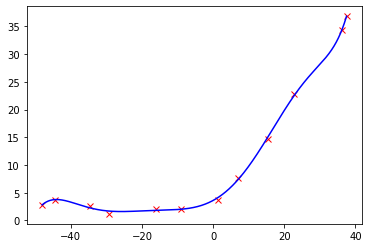

In [12]:
import numpy as np
from numpy.core.fromnumeric import transpose
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def gradiente(Theta,X,Y):
	m = np.shape(X)[0]
	H = np.dot(X,Theta)
	return np.dot(H-Y.T,X)/m

def gradiente_reg_1(theta, X, Y, landa):
    theta = theta.reshape((theta.shape[0], 1))
    m = X.shape[0]
    H = np.matmul(X, theta)
    grad = (X.T.dot(H-Y)/(m)) + ((landa)/m)*theta
    return grad

def gradiente_reg_2(theta, X, Y, landa):
    m = np.shape(X)[0]
    grad = gradiente(theta,X,Y)
    grad_0 = grad[0]
    j = grad + (landa/(m))*theta
    j[0] = grad_0
    return j


def coste_reg(theta, X, Y, landa):
    m = np.shape(X)[0]
    H = np.dot(X,theta)
    return (np.sum((H-Y.T)**2))/(2*m) + (landa/(2*m))*np.sum(theta[1:] **2)


def calcula_coste_gradiente_reg_1(theta, X, Y, landa):
    return coste_reg(theta, X, Y, landa), gradiente_reg_1(theta, X, Y, landa)


def calcula_coste_gradiente_reg_2(theta, X, Y, landa):
    return coste_reg(theta, X, Y, landa), gradiente_reg_2(theta, X, Y, landa)


def normaliza(matriz):
    #xi = (xi - ui) / si
    #ui = media ; si = desviación típica
    matriz_normal = np.empty_like(matriz)

    u = np.mean(matriz, axis=0)
    s = np.std(matriz, axis=0)
    # print('Media: ' + str(u))
    # print('Desv: ' + str(s))

    matriz_normal = (matriz - u) / s

    return [matriz_normal, u, s]

def nuevos_datos(X, p) :
    mat = np.zeros([np.shape(X)[0], p])

    for i in range(1, p+1) :
        mat[:, i-1] = (X**i).ravel()
    
    #print("nuevos", mat)
    return mat


def apartado1(X, y):
    #m = np.shape(X)[0]

    auxX = np.insert(X, 0, 1, axis=1)

    theta = np.array([[1], [1]])
    landa = 0

    #coste = coste_reg(theta, auxX, y, landa)
    #g = gradiente_reg_1(theta, auxX, y, landa)

    result = minimize(calcula_coste_gradiente_reg_1, theta,
                      args=(auxX, y, landa), jac=True, method='TNC')

    # Pintamos grafica
    plt.figure()
    # Pintamos x
    plt.plot(X, y, "x", color='red')

    min_x = min(X)
    max_x = max(X)
    min_y = result.x[0] + result.x[1]*min_x
    max_y = result.x[0] + result.x[1]*max_x

    # Pintamos recta
    plt.plot([min_x, max_x], [min_y, max_y], color='blue', linewidth=2)
    # Guardamos imagen
    plt.savefig("regresionLineal.png")
    plt.show()
    plt.close()


def apartado2(X, y, Xval, yval, landa):
    m = np.shape(X)[0]
    mValidacion = np.shape(Xval)[0]
    Xval = np.hstack([np.ones([mValidacion,1]),Xval])
    
    eValidation = np.zeros([m])
    eTraning = np.zeros([m])
    
    for i in range(1,m+1):
        theta = np.zeros(np.shape(X)[1])
        result = minimize(calcula_coste_gradiente_reg_2, theta, args = (X[0:i], y[0:i,0], landa), jac = True, method = 'TNC')
        eTraning[i-1] = coste_reg(result.x, X[0:i], y[0:i], landa)
        eValidation[i-1] = coste_reg(result.x, Xval, yval, landa)
    
    plt.figure()
    plt.plot(np.linspace(0,11,12,dtype=int), eTraning, label='Train')
    plt.plot(np.linspace(0,11,12,dtype=int), eValidation, label='Cross Validation')
    plt.legend()
    plt.title('Learning curve for linear regression')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')    
    plt.savefig("curvasAprendizaje.png")
    plt.show()
    # Guardamos imagen
    plt.close()


def apartado3(X, p, landa) :
    mat = nuevos_datos(X, p)
    u = np.zeros([p])
    s = np.zeros([p])
    mat, u, s = normaliza(mat)
    

    mat = np.hstack([np.ones([np.shape(mat)[0],1]),mat])
    
    print("map:", mat)
    

    theta = np.zeros(np.shape(mat[1]))
    
    print("theta", theta)

    result = minimize(calcula_coste_gradiente_reg_2, theta,
                      args=(mat, y, landa), jac=True, method='TNC')
    
    print("Result", result)

    # Pintamos grafica
    plt.figure()
    # Pintamos x
    plt.plot(X, y, "x", color='red')
    # Pintamos la linea
    lineX = np.arange(np.min(X),np.max(X),0.05)
    aux_x = (nuevos_datos(lineX, p)-u) / s
    print("aux", aux_x)
    lineY = np.hstack([np.ones([len(aux_x),1]),aux_x]).dot(result.x)
    plt.plot(lineX, lineY, '-', c = 'blue')
    #plt.savefig("regPolinomial.png")
    plt.show()
    # Guardamos imagen
    plt.close()

def apartado3_2(X,p, xval, landa):
    mat, u, s = normaliza(nuevos_datos(X, p))
    mat = np.hstack([np.ones([np.shape(mat)[0],1]),mat])

    matXval =  (nuevos_datos(xval,p) - u  )/s
    apartado2(mat, y, matXval, yval, landa)

def apartado4_1(X, xVal, y, yVal,p ):
    lambdas = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    
    mat, u , s = normaliza(nuevos_datos(X,p))
    matXval, uXval, sXval =  normaliza(nuevos_datos(xVal, p))

    mat = np.hstack([np.ones([np.shape(mat)[0],1]),mat])
    matXval = np.hstack([np.ones([np.shape(matXval)[0],1]),matXval])

    eTraining = np.zeros((len(lambdas),1))
    eValidation = np.zeros((len(lambdas),1))

    for i in range(len(lambdas)):
        theta = np.zeros(np.shape(mat)[1])
        result = minimize(calcula_coste_gradiente_reg_2, theta, args = (mat, y, lambdas[i]), jac = True, method = 'TNC')
        eTraining[i] = coste_reg(result.x,mat,y,0)
        eValidation[i] = coste_reg(result.x,matXval,yVal,0)

    plt.figure()
    plt.plot(lambdas,eTraining,label="Entrenamiento")
    plt.plot(lambdas,eValidation,label="Validacion")
    plt.savefig("PruebasLambdas.png")
    plt.show()
    plt.close()


def apartado4_2( X, XTest,  y, yTest, p, landa):
    mat, u , s = normaliza(nuevos_datos(X,p))
    mat = np.hstack([np.ones([np.shape(mat)[0],1]),mat])

    theta = np.zeros(np.shape(mat[1]))

    result = minimize(calcula_coste_gradiente_reg_2, theta, args = (mat, y, landa ), jac = True, method = 'TNC')
    
    matTest = nuevos_datos(XTest,p)
    matTest = ((matTest - u)/s)
    matTest = np.hstack([np.ones([np.shape(matTest)[0],1]),matTest])
    
    error = coste_reg(result.x, matTest, yTest, 0)
    print("Error para lambda = 3: "  + str(error))

data = loadmat('ex5data1.mat')

y = data['y']
X = data['X']
m = np.shape(X)[0]
auxX = np.hstack([np.ones([m,1]),X])

Xval = data['Xval']
yval = data['yval']

#apartado1(X,y)
#apartado2(auxX, y, Xval, yval, 0)
apartado3(X, 8, 0)

#apartado3_2(X,8,Xval, 100)
#apartado4_1(X,Xval, y, yval, 8)

#apartado4_2(X,data['Xtest'], y, data['ytest'], 8, 3)

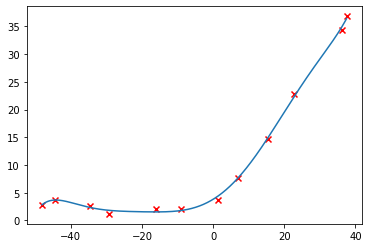

In [5]:
import scipy.optimize
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt


def plot_decisionboundary(X, Y, Theta, poly):
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
                           np.linspace(x2_min, x2_max))

    h = coste_lineal(poly.fit_transform(np.c_[xx1.ravel(),
                                              xx2.ravel()]).dot(Theta))
    h = h.reshape(xx1.shape)

    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')
    plt.show()


def h(x, theta):
    return theta[0] + theta[1] * x


def plot_line(X, Y):
    plt.plot(X, Y)


def plot_regression(X, Y, theta):
    min_x = np.min(X)
    max_x = np.max(X)
    min_y = h(min_x, theta)
    max_y = h(max_x, theta)
    plt.plot(X, Y, "x")
    plt.plot([min_x, max_x], [min_y, max_y])
    # plt.savefig("apartado1_line.png")


def coste_regularizado(Theta, X, Y, lamb):
    m = X.shape[0]
    reg = (lamb / (2 * m)) * np.sum(Theta[1:] ** 2)
    return coste_lineal(Theta, X, Y) + reg


def coste_lineal(Theta, X, Y):
    m = X.shape[0]
    H = np.dot(X, np.transpose(Theta))
    sigma = np.sum((H - Y) ** 2)
    return sigma / (2 * m)


def gradiente(Theta, X, Y):
    m = np.shape(X)[0]
    H = np.dot(X, Theta)
    a = np.matmul(np.transpose(X), H - Y)
    return a / m


def gradiente_regularizado(Theta, X, Y, lamb):
    grad = gradiente(Theta, X, Y)
    g_0 = grad[0]
    regularizador = (lamb / np.shape(X)[0]) * Theta
    grad = grad + regularizador
    grad[0] = g_0
    return grad


def minimize_this_pls(Theta, X, Y, lamb):
    return coste_regularizado(Theta, X, Y, lamb), gradiente_regularizado(Theta, X, Y, lamb)


def normaliza_matriz(x):
    mu = np.mean(x, axis=0)  # Media de cada columna
    sigma = np.std(x, axis=0)  # Desviacion estandar por columnas, no confundir con la querida std de c++

    return (x - mu) / sigma, mu, sigma


def polinomiza_atributos(X, p):
    Pol = X
    for i in range(2, p + 1):
        Pol = np.hstack([Pol, X ** i])

    return Pol


def load_data(filename='ex5data1.mat'):
    data = loadmat(filename)
    X = data['X']
    Y = data['y']
    Y = Y[:, -1]
    X_val = data['Xval']
    Y_val = data['yval']
    Y_val = Y_val[:, -1]
    X_test = data['Xtest']
    Y_test = data['ytest']
    Y_test = Y_test[:, -1]
    return X, Y, X_val, Y_val, X_test, Y_test


def learning_curves():
    X, Y, X_val, Y_val, X_test, Y_test = load_data()

    X = np.hstack([np.ones([X.shape[0], 1]), X])
    X_val = np.hstack([np.ones([X_val.shape[0], 1]), X_val])
    m = X.shape[0]

    Errors = np.empty((m, 2))
    sliceSize = np.arange(1, m)

    for i in sliceSize:
        Theta = np.array([1, 1])
        res = scipy.optimize.minimize(minimize_this_pls, Theta, args=(X[0:i], Y[0:i], 0),
                                      jac=True, method='TNC')
        err = coste_lineal(res.x, X[0:i], Y[0:i])
        errVal = coste_lineal(res.x, X_val, Y_val)
        Errors[i - 1] = np.array([err, errVal])

    plt.plot(sliceSize, Errors[:-1, 0])
    plt.plot(sliceSize, Errors[:-1, 1])
    plt.show()


def try_funcs():
    X, Y, X_val, Y_val, X_test, Y_test = load_data()
    m = X.shape[0]
    Theta = np.array([1, 1])
    X = np.hstack([np.ones([X.shape[0], 1]), X])

    print(coste_regularizado(Theta, X, Y, 1))
    print(gradiente_regularizado(Theta, X, Y, 1))


def polinomize_and_normalize(M, p):
    Pol_M = polinomiza_atributos(M, p)
    Pol_M, media, varianza = normaliza_matriz(Pol_M)

    Pol_M = np.hstack([np.ones([Pol_M.shape[0], 1]), Pol_M])

    # TODO puede que haga falta hacer hstack de 1 a la media y 0 a la varianza
    # media = np.hstack([np.ones(1), media])
    # varianza = np.hstack([np.zeros(1), varianza])

    return Pol_M, media, varianza


def plot_polynomial_regression(X, Y, Theta, p):
    Norm_Pol_X, mu, sigma = polinomize_and_normalize(X, p)
    h = Norm_Pol_X.dot(Theta.T)

    plotSpace = np.linspace(min(X), max(X), 1700)
    plotSpace_np = polinomiza_atributos(plotSpace, p)
    plotSpace_np = (plotSpace_np - mu) / sigma
    plotSpace_np = np.hstack([np.ones([plotSpace_np.shape[0], 1]), plotSpace_np])

    h_plot = plotSpace_np.dot(Theta.T)

    plt.scatter(X, Y, marker="x", c='red')
    plt.plot(plotSpace, h_plot)  # para dibujar puntos conectados, scatter para puntos suelts


def learning_curves_polynomial():
    X, Y, X_val, Y_val, X_test, Y_test = load_data()
    m = X.shape[0]

    p = 8
    X_np, media, varianza = polinomize_and_normalize(X, p)
    X_val_np, media, varianza = polinomize_and_normalize(X_val, p)

    lamb = 0
    Errors = np.empty((m, 2))
    sliceSize = np.arange(1, m)

    for i in sliceSize:
        Theta = np.ones(X_np.shape[1])
        res = scipy.optimize.minimize(minimize_this_pls, Theta, args=(X_np[0:i], Y[0:i], lamb),
                                      jac=True, method='TNC')
        err = coste_lineal(res.x, X_np[0:i], Y[0:i])
        errVal = coste_lineal(res.x, X_val_np, Y_val)
        Errors[i - 1] = np.array([err, errVal])

    plot_line(sliceSize, Errors[:-1, 0])
    plot_line(sliceSize, Errors[:-1, 1])
    plt.show()


def polynomial_regression():
    X, Y, X_val, Y_val, X_test, Y_test = load_data()
    m = X.shape[0]

    p = 8
    Pol_X = polinomiza_atributos(X, p)
    Norm_Pol_X, media, varianza = normaliza_matriz(Pol_X)

    Norm_Pol_X = np.hstack([np.ones([Norm_Pol_X.shape[0], 1]), Norm_Pol_X])
    Theta = np.ones(Norm_Pol_X.shape[1])

    lamb = 0
    res = scipy.optimize.minimize(minimize_this_pls, Theta, args=(Norm_Pol_X, Y, lamb),
                                  jac=True, method='TNC')

    plot_polynomial_regression(X, Y, res.x, p)
    plt.show()


def choose_lambda():
    X, Y, X_val, Y_val, X_test, Y_test = load_data()
    m = X.shape[0]

    p = 8
    X_np, mu, sigma = polinomize_and_normalize(X, p)

    X_val_np = polinomiza_atributos(X_val, p)
    X_val_np = (X_val_np-mu)/sigma
    X_val_np = np.hstack([np.ones([X_val_np.shape[0], 1]), X_val_np])

    X_test_np = polinomiza_atributos(X_test, p)
    X_test_np = (X_test_np-mu)/sigma
    X_test_np = np.hstack([np.ones([X_test_np.shape[0], 1]), X_test_np])

    lambdas = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    Errors = np.empty((lambdas.shape[0], 2))
    i = 0
    Theta = np.ones(X_np.shape[1])
    for lamb in lambdas:
        Theta = np.ones(X_np.shape[1])
        res = scipy.optimize.minimize(minimize_this_pls, Theta, args=(X_np, Y, lamb),
                                      jac=True, method='TNC')
        err = coste_lineal(res.x, X_np, Y)
        errVal = coste_lineal(res.x, X_val_np, Y_val)
        Errors[i] = np.array([err, errVal])
        i = i + 1

    plt.plot(lambdas, Errors[:, 0], label='Train')
    plt.plot(lambdas, Errors[:, 1], label='Cross Validation')
    plt.legend()
    plt.show()

    res = scipy.optimize.minimize(minimize_this_pls, Theta, args=(X_np, Y, 3),
                                  jac=True, method='TNC')
    print(coste_lineal(res.x, X_test_np, Y_test))


def main():
    # plot_line(X[:, 1:], Y, res.x)
    # Errors = learning_curves(X, Y, X_val, Y_val)
    # learning_curves()
    polynomial_regression()
    #choose_lambda()


main()